# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [2]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

Rozwiązanie zadania znajduje się w pliku main.py

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

Funkcje zaimplementowałem w pliku main.py

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

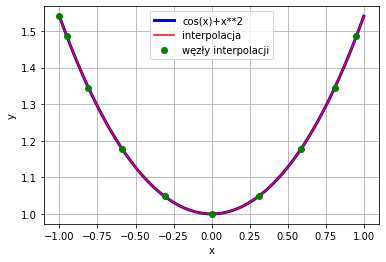

In [2]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = int(1e1)
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

Rozwiązanie zadania: 

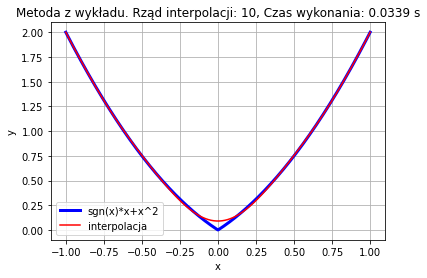

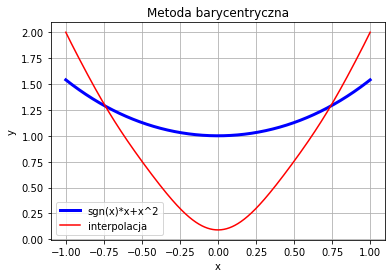

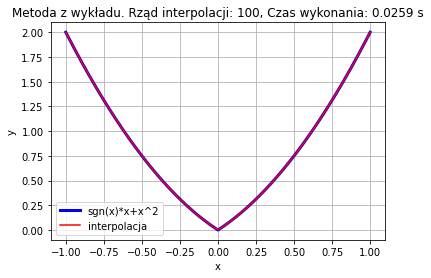

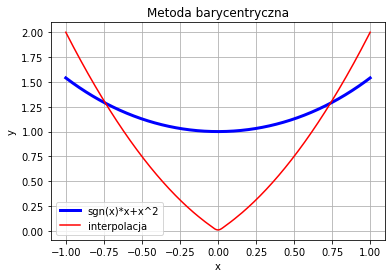

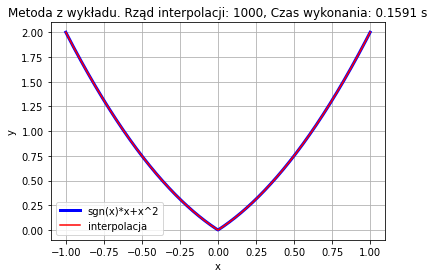

c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:636: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:540: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
c:\users\maciek\appdata\local\programs\pyth

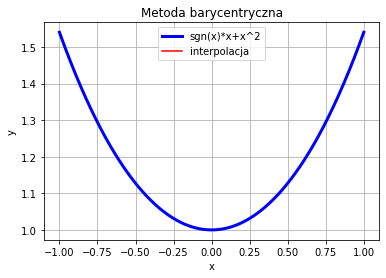

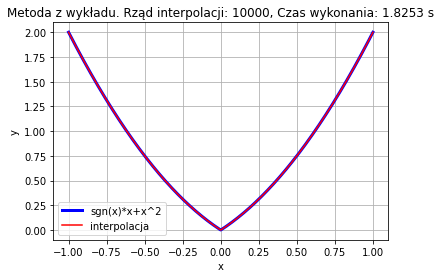

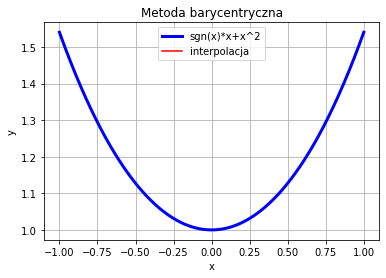

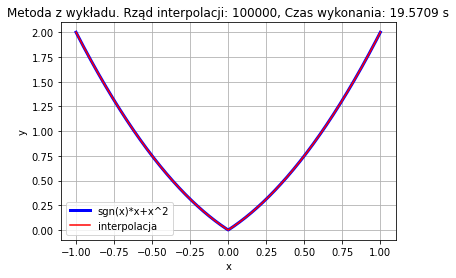

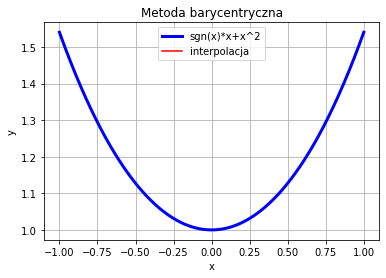

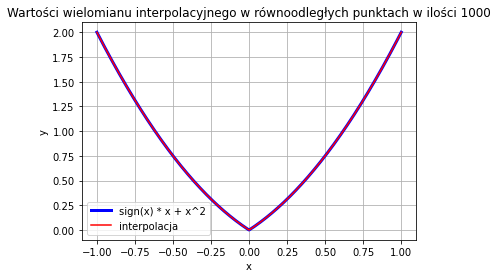

In [3]:
from time import time
# Funkcja ciągła nieróżniczkowalna
"""
# Zdefiniowana wcześniej - zadanie 2
def f_1(x):
    return np.sign(x) * x + np.power(x, 2)
"""

for num in [11, 101, 1001, 10001, 100001]:
    # metoda z wykladu
    start = time()
    x = np.linspace(-1 + 1e-5, 1 - 1e-5, 1000)
    nod = main.chebyshev_nodes(num)
    val = np.array([main.f_1(nod_elem) for nod_elem in nod])
    yimp = main.barycentric_inte(nod, val, main.bar_czeb_weights(num), x)
    end = time()
    
    plt.figure()
    plt.plot(x,main.f_1(x),'b',  linewidth=3 ,label = 'sgn(x)*x+x^2')
    plt.plot(x,yimp,'r',label = 'interpolacja')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.title('Metoda z wykładu. Rząd interpolacji: {}, Czas wykonania: {:.4f} s'.format(num-1, end-start))
    plt.grid()
    plt.show()
    
    # interpoalcja metodą barycentryczną
    yimp2 = barycentric_interpolate(nod, val, x)

    plt.plot(x,f(x),'b',  linewidth=3 ,label = 'sgn(x)*x+x^2')
    plt.plot(x,yimp2,'r',label = 'interpolacja')
    plt.title('Metoda barycentryczna')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.grid()
    plt.show()
   
# wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.
x = np.linspace(-1, 1, 1000)

# Dane zaprezentowałem na wykresie

yimp2 = main.barycentric_inte(nod, val, main.bar_czeb_weights(num), x)

plt.plot(x,main.f_1(x),'b',  linewidth=3 ,label = 'sign(x) * x + x^2')
plt.plot(x,yimp2,'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.title('Wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000')
plt.grid()
plt.show()



Dla funkcji wbudowanej (metoda barycentryczna) wykres nie rysuje się od rzędu większego niż 1000 i zwraca błędy


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [4]:
for num in [11, 101, 1001, 10001, 100001]:
    x = np.linspace(-1 + 1e-5, 1 - 1e-5, 1000)
    nod = main.chebyshev_nodes(num)
    val = np.array([main.f_1(nod_elem) for nod_elem in nod])
    yimp = main.barycentric_inte(nod, val, main.bar_czeb_weights(num), x)
    yimp2 = barycentric_interpolate(nod, val, x)
    
    print("Norma interpolacji (metoda z barycentryczna) rzędu {} wynosi: {}".format(num - 1, main.L_inf(main.f_1(x), yimp2)))
    print("Norma interpolacji (metoda z wykładu) rzędu {} wynosi: {}".format(num - 1, main.L_inf(main.f_1(x), yimp)))
    

Norma interpolacji (metoda z barycentryczna) rzędu 10 wynosi: 0.08991075688858872
Norma interpolacji (metoda z wykładu) rzędu 10 wynosi: 0.08991075688858852
Norma interpolacji (metoda z barycentryczna) rzędu 100 wynosi: 0.008924529004467349
Norma interpolacji (metoda z wykładu) rzędu 100 wynosi: 0.008924529004467446
Norma interpolacji (metoda z barycentryczna) rzędu 1000 wynosi: nan
Norma interpolacji (metoda z wykładu) rzędu 1000 wynosi: 0.00023654656913320023
Norma interpolacji (metoda z barycentryczna) rzędu 10000 wynosi: nan
Norma interpolacji (metoda z wykładu) rzędu 10000 wynosi: 1.8500003436477085e-06
Norma interpolacji (metoda z barycentryczna) rzędu 100000 wynosi: nan
Norma interpolacji (metoda z wykładu) rzędu 100000 wynosi: 2.234658450471494e-09


c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:636: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:540: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])


Jak dalej widać metoda barycentryczna nie jest idealna.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Zero maszynowe = 1.1102230246251565e-16


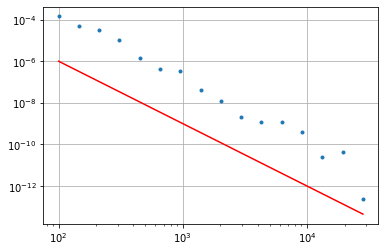

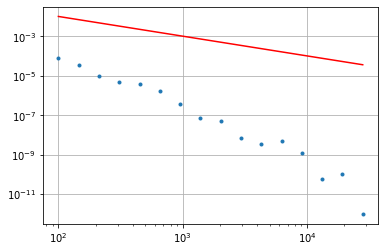

In [3]:
machine_zero = 1
while 1 + machine_zero != 1:
    machine_zero /= 2
    
print('Zero maszynowe = {}'.format(machine_zero))

for f, num_of_d in [[main.f_3, 3], [main.f_2, 1]]:
    n_s = []
    n_v = []
    norm_s = []
    
    for i in np.ceil(np.logspace(2, 10)).astype(int):
        i = int(i)
        bars = main.bar_czeb_weights(i)
        nodes = main.chebyshev_nodes(i)
        values = np.array(f(nodes))
        xs = np.linspace(-1 + 1e-5, 1-1e-5, 1001)
        true_values = np.array(f(xs))
        f1_interpolation_values = main.barycentric_inte(nodes, values, bars, xs)
        norma = main.L_inf(true_values, f1_interpolation_values)
        norm_s.append(norma)
        n_s.append(i)
        n_v.append(i**(-num_of_d))
        
        if norma <= 10000 * machine_zero: # inaczej pętla się nie kończy na moim komputerze
            break
            
    plt.figure()
    plt.loglog(n_s, norm_s, '.') 
    plt.loglog(n_s, n_v, 'r-')
    plt.grid('on')
    plt.show()

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

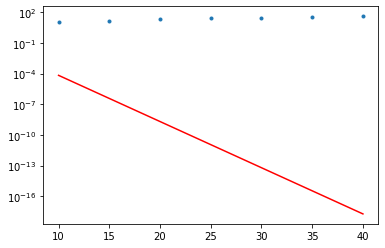

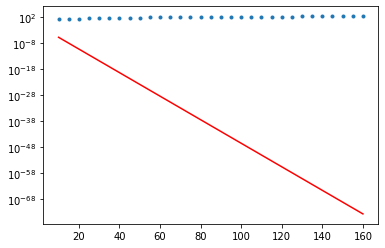

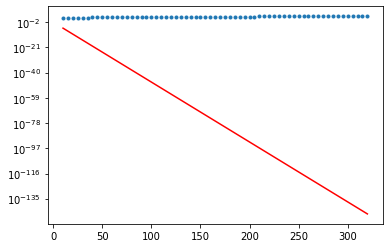

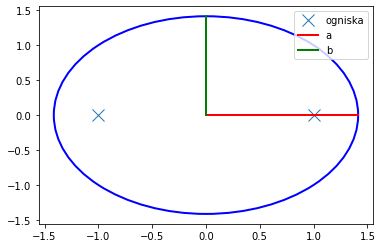

In [3]:
from matplotlib.patches import Ellipse
for f, pierw in [[main.f_4a1, 1j],[main.f_4a25, 1j],[main.f_4a100, 1j]]:
    n_s = []
    norm_s = []
    xs = np.linspace(-1+1e-5, 1-1e-5, 1001)
    true_vals = np.array(f(xs))
    
    for n in range (10, 600, 5):
        n = int(n)
        wagi = main.bar_czeb_weights(n)
        nodes = main.chebyshev_nodes(n)
        values = np.array(f(nodes))
        f1_interp_values = main.barycentric_inte(nodes, values, wagi, xs)
        norma = main.L_inf(true_vals, f1_interp_values)
        norm_s.append(n)
        n_s.append(n)
        
        if norma < 22.55351295663786e-15:
            break
            
    pierwiastki = [-pierw, pierw]
    maxx = max(true_vals)
    b = np.sqrt(1+np.imag(pierw)**2) - 1e-10
    a = np.sqrt(1+np.imag(pierw)**2)
    rho = a+b
    M = f(b*1j)
    oszac = [4 * abs(np.real(M)) * (1 / np.power(rho, x)) / (rho - 1) for x in n_s]
    
    plt.figure()
    plt.plot(n_s, norm_s, '.')
    plt.plot(n_s, oszac, 'r-')
    plt.yscale('log')
    plt.show()

elipsa=plt.figure()
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='b', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1, 1], [0, 0], 'x', label='ogniska',markersize=12)
ax.plot([0, a], [0, 0], 'r', lw=2, label='a')
ax.plot([0, 0], [0, b], 'g', lw=2, label='b')
ax.legend()

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Rozwiązanie zadania:

Norma wektorowa interpolacji z n o wartości 10 wynosi 1.9955398385123277
Norma wektorowa interpolacji z n o wartości 100 wynosi 1.9541724931356415
Norma wektorowa interpolacji z n o wartości 1000 wynosi 1.4145663706729859
Norma wektorowa interpolacji z n o wartości 10000 wynosi 0.06347047900370129
Norma interpolacji z n o wartości 9 wynosi 0.9932744755907834
Norma interpolacji z n o wartości 99 wynosi 0.9264659631561982
Norma interpolacji z n o wartości 999 wynosi 0.3024632440725308
Norma interpolacji z n o wartości 9999 wynosi 0.08149311356407885


<Figure size 432x288 with 0 Axes>

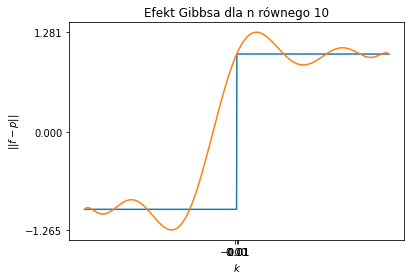

<Figure size 432x288 with 0 Axes>

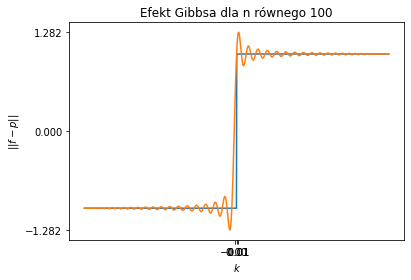

<Figure size 432x288 with 0 Axes>

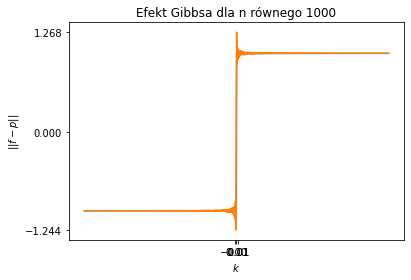

<Figure size 432x288 with 0 Axes>

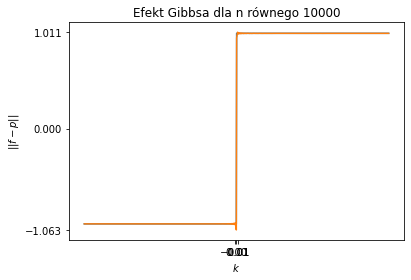

<Figure size 432x288 with 0 Axes>

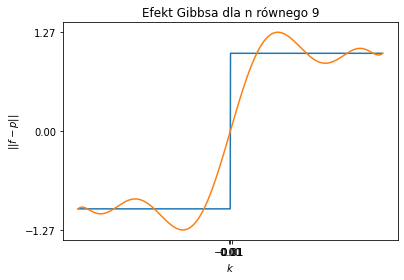

<Figure size 432x288 with 0 Axes>

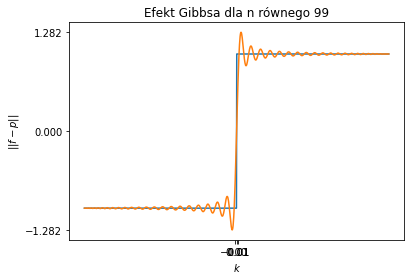

<Figure size 432x288 with 0 Axes>

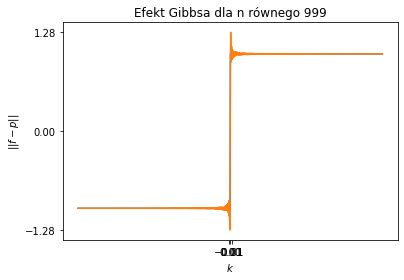

<Figure size 432x288 with 0 Axes>

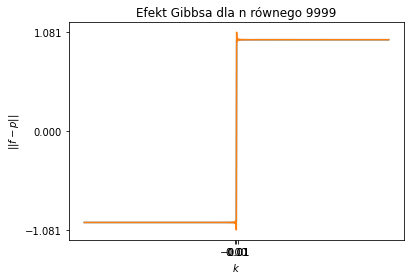

In [13]:
# dla liczb parzystych
for num in [10, 100, 1000, 10000]:
    x = np.linspace(-1+1e-5,1-1e-5,1000)
    nod = main.chebyshev_nodes(num)
    val = np.array([main.f_5(elem) for elem in nod])
    f1_itr = main.barycentric_inte(nod, val, main.bar_czeb_weights(num), x)
    
    print('Norma wektorowa interpolacji z n o wartości {} wynosi {}'.format(num, main.L_inf(main.f_5(x),f1_itr)))
    
    plt.figure()
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, main.f_5(x))
    ax.plot(x, f1_itr)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$||f-p||$')
    ax.set_xticks([-.01, 0, .01])
    ax.set_yticks([np.amin(f1_itr), 0, np.amax(f1_itr, axis=None)])
    ax.set_title('Efekt Gibbsa dla n równego {}'.format(num))
    plt.show()
    
# dla liczb nieparzystych 
for num in [9, 99, 999, 9999]:
    x = np.linspace(-1+1e-5, 1-1e-5,1000)
    nod = main.chebyshev_nodes(num)
    val = np.array([main.f_5(elem) for elem in nod])
    f1_itr = main.barycentric_inte(nod, val, main.bar_czeb_weights(num), x)
    
    print('Norma interpolacji z n o wartości {} wynosi {}'.format(num, main.L_inf(main.f_5(x), f1_itr)))
    
    plt.figure()
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, main.f_5(x))
    ax.plot(x, f1_itr)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$||f-p||$')
    ax.set_xticks([-.01, 0, .01])
    ax.set_yticks([np.amin(f1_itr), 0, np.amax(f1_itr, axis=None)])
    ax.set_title('Efekt Gibbsa dla n równego {}'.format(num))
    plt.show()

Wartości dla parzystych i nieparzystych n różnią się, ponieważ jeżeli funkcja jest parzysta to transformata Fouriera jest również parzysta, a jeżeli funkcja jest nieparzysta, to jej transformata Fouriera jest również nieparzysta.
Wykres nadmiernie oscyluje wokół punktów nieciągłości funkcji x.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)